In [3]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

# Q.1: Two site Hubbard model at half filling

## Part 4
<b>Pass now to a computer and plot the $4$ eigenvalues over the range $\frac{u}{t}=0$ to $\frac{U}{t}=20$. Determine the ground state $|ψ_0⟩$ through smallest eigenvalue $E_0$ and plot over the same $\frac{U}{t}$ range the probabilities $|⟨a|ψ_0⟩|^2$ of being in any of the four basis states $|a⟩∈B$. Based on your results show that at large $U$ the ground state is a spin singlet.

See part 3 in the PDF for the calculation of the eigenvalues and eigenvectors.

In [4]:
U = 1
t = 1

Utval = np.arange(0,20.1, 0.1)
tval = U/(Utval[1:])

def eval_fixed_t(Ut): # This function considers varying U and keeping t fixed so that U/t can change
    lambda1 = [] #lambda1 = 0
    lambda2 = [] #lambda2 = U
    lambda3 = [] #lambda3 = 0.5*(U - √(U^2 + 16t^2))
    lambda4 = [] #lambda4 = 0.5*(U + √(U^2 + 16t^2))
    for u_t in Ut:
        e1 = 0
        e2 = t * u_t
        e3 = 0.5*t*(u_t - np.sqrt(u_t**2+16))
        e4 = 0.5*t*(u_t + np.sqrt(u_t**2+16))
        lambda1 = np.append(lambda1, e1)
        lambda2 = np.append(lambda2, e2)
        lambda3 = np.append(lambda3, e3)
        lambda4 = np.append(lambda4, e4)
    return lambda1, lambda2, lambda3, lambda4

def eval_fixed_U(tval): # This function considers varying t and keeping U fixed so that U/t can change
    lambda1 = [] #lambda1 = 0
    lambda2 = [] #lambda2 = U
    lambda3 = [] #lambda3 = 0.5*(U - √(U^2 + 16t^2))
    lambda4 = [] #lambda4 = 0.5*(U + √(U^2 + 16t^2))
    for t in tval:
        e1 = 0
        e2 = U
        e3 = 0.5*(U - np.sqrt(U**2+16*t**2))
        e4 = 0.5*(U + np.sqrt(U**2+16*t**2))
        lambda1 = np.append(lambda1, e1)
        lambda2 = np.append(lambda2, e2)
        lambda3 = np.append(lambda3, e3)
        lambda4 = np.append(lambda4, e4)
    return lambda1, lambda2, lambda3, lambda4

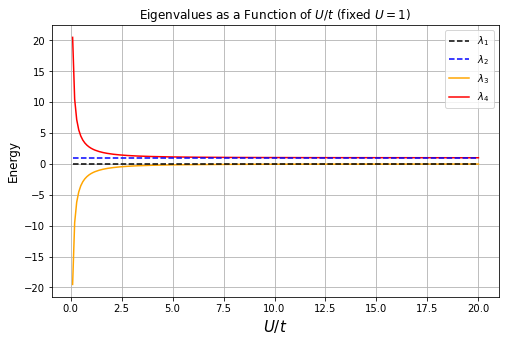

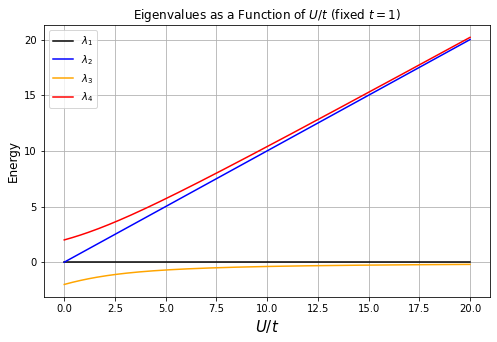

In either the fixed U or t case, it is lambda3 which has the minimum energy value so its corresponding eigenvector is the ground state.


In [5]:
lambda1t, lambda2t, lambda3t, lambda4t = eval_fixed_t(Utval)
lambda1u, lambda2u, lambda3u, lambda4u = eval_fixed_U(tval)

fig = plt.figure(figsize = (8,5))

plt.title(r'Eigenvalues as a Function of $U/t$ (fixed $U=$'+str(int(U))+')')
plt.plot(Utval[1:], lambda1u, label = r'$λ_1$', c = 'k', ls = '--', zorder = 9)
plt.plot(Utval[1:], lambda2u, label = r'$λ_2$', c = 'b', ls = '--', zorder = 9)
plt.plot(Utval[1:], lambda3u, label = r'$λ_3$', c = 'orange')
plt.plot(Utval[1:], lambda4u, label = r'$λ_4$', c = 'r')
plt.xlabel(r'$U/t$', fontsize = 15)
plt.ylabel('Energy', fontsize = 12)
plt.legend()
plt.grid()
plt.show()

fig = plt.figure(figsize = (8,5))

plt.title(r'Eigenvalues as a Function of $U/t$ (fixed $t=$'+str(int(t))+')')
plt.plot(Utval, lambda1t, label = r'$λ_1$', c = 'k')
plt.plot(Utval, lambda2t, label = r'$λ_2$', c = 'b')
plt.plot(Utval, lambda3t, label = r'$λ_3$', c = 'orange')
plt.plot(Utval, lambda4t, label = r'$λ_4$', c = 'r')
plt.xlabel(r'$U/t$', fontsize = 15)
plt.ylabel('Energy', fontsize = 12)
plt.legend()
plt.grid()
plt.show()

print("In either the fixed U or t case, it is lambda3 which has the minimum energy value so its corresponding eigenvector is the ground state.")

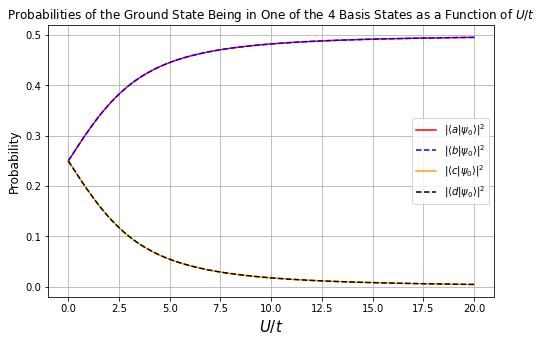

From the curves, we can see that at large U/t the ground state tends to a superposition of |a⟩ and |b⟩ with equal coefficients and we know from the eigenvectors (see written answers) that they have opposite sign i.e |ψ0⟩ = 1/√2(|↑,↓⟩-|↓,↑⟩) which is, by definition, a singlet state.


In [6]:
# Let x_psi_0 = |⟨x|ψ0⟩|^2 for x = the vectors a,b,c,d defined in the answer for part 3.
def a_psi_0(Ut):
    arr = []
    for u_t in Ut:
        g = 4/(16+u_t**2-np.sqrt(u_t**4+16*u_t**2))
        arr = np.append(arr, g)
    return arr

def b_psi_0(Ut):
    arr = []
    for u_t in Ut:
        g = 4/(16+u_t**2-np.sqrt(u_t**4+16*u_t**2))
        arr = np.append(arr, g)
    return arr

def c_psi_0(Ut):
    arr = []
    for u_t in Ut:
        g = 1/(32/(u_t-np.sqrt(u_t**2+16))**2+2)
        arr = np.append(arr, g)
    return arr

def d_psi_0(Ut):
    arr = []
    for u_t in Ut:
        g = 1/(32/(u_t-np.sqrt(u_t**2+16))**2+2)
        arr = np.append(arr, g)
    return arr

fig = plt.figure(figsize = (8,5))
plt.title(r'Probabilities of the Ground State Being in One of the 4 Basis States as a Function of $U/t$')
plt.plot(Utval, a_psi_0(Utval), label = r'$|⟨a|ψ_0⟩|^2$', c = 'r')
plt.plot(Utval, b_psi_0(Utval), label = r'$|⟨b|ψ_0⟩|^2$', ls = '--', c = 'b')
plt.plot(Utval, c_psi_0(Utval), label = r'$|⟨c|ψ_0⟩|^2$', c = 'orange')
plt.plot(Utval, d_psi_0(Utval), label = r'$|⟨d|ψ_0⟩|^2$', ls = '--', c = 'k')
plt.xlabel(r'$U/t$', fontsize = 15)
plt.ylabel('Probability', fontsize = 12)
plt.legend()
plt.grid()
plt.show()

print('From the curves, we can see that at large U/t the ground state tends to a superposition of |a⟩ and |b⟩ \
with equal coefficients and we know from the eigenvectors (see written answers) that they have opposite sign i.e \
|ψ0⟩ = 1/√2(|↑,↓⟩-|↓,↑⟩) which is, by definition, a singlet state.')

# Q.2: Mean field theory for Stoner transition

## Part 2
<b>Implement the following algorithm [items (a)–(d) describe the algorithm, (e) is for
checking the validity]:

##### a) Choose a lattice size of $N_s = 256$. The momenta run then over the values $k = \frac{2π}{N_s}j$ with $j = −\frac{N_s}{2}+1, −\frac{N_s}{2}+2, . . . , \frac{N_s}{2}$. Choose the number $N$ of particles to be $N = 128$ (i.e. quarter filling).

In [7]:
Ns = int(256)
N = int(Ns/2)
jval = np.arange(-Ns/2+1,Ns/2+1,1)
kval = 2*np.pi/Ns*jval

##### b) The idea of the algorithm is to scan over all possible values of $M$ (which means e.g. to scan over $N_↑ = 0, 1, . . . ,N$) and to determine the smallest energy $E_0$ for each $M$. The ground state is then found by identifying the $M$ with the lowest $E_0$.

In [8]:
Nupval = np.arange(0, N+1)

##### c) For each pair ($N_↑,N_↓$) the densities of the two spin species are $⟨n_σ⟩ = \frac{N_σ}{N_s}$. Calculate the energies for each spin species, $E_↑$ and $E_↓$ as given by the formulas above. The total energy per site is then given by $\frac{E_0}{N_s}=\frac{E_↑+E_↓}{N_s}-U⟨n_↑⟩⟨n_↓⟩$.

In [9]:
t = 1
ksor = sorted(kval, key = abs)
def Eup(Nup, U):
    Nup = int(Nup)
    eu = []
    Ndown = int(N - Nup)
    k = ksor[:Nup]
    ndown = Ndown/Ns
    for kv in k:
        eu = np.append(eu, -2*t*np.cos(kv)+U*ndown)
    E = np.sum(eu)
    return E

def Edown(Nup, U):
    ed = []
    Ndown = int(N - Nup)
    k = ksor[:Ndown]
    nup = Nup/Ns
    for kv in k:
        ed = np.append(ed, -2*t*np.cos(kv)+U*nup)
    E = np.sum(ed)
    return E

def E0Ns(Nup, U):
    Ndown = int(N - Nup)
    ndown = Ndown/Ns
    nup = Nup/Ns
    ets = (Eup(Nup, U)+Edown(Nup, U))/Ns - U*nup*ndown
    return ets

##### d) Determine which magnetisation $M$ (i.e. which $N_↑$) minimises the total energy.

In [10]:
def energies(Nupval, U):
    nrgs = []
    for n in Nupval:
        e = E0Ns(n, U)
        nrgs = np.append(nrgs, e)
    return nrgs

nrgs = energies(Nupval, 1)
index = nrgs.argmin()
# M = (Nup - Ndown)/N = (Nup - (N-Nup))/N = (2Nup - N)/N
Mmin = (2*Nupval[index] - N)/N
print("The magnetisation that minimises the energy is M =", Mmin, "with the corresponding Nup =", str(int(Nupval[index]))+".")

The magnetisation that minimises the energy is M = -0.015625 with the corresponding Nup = 63.


##### e) Make two plots of $\frac{E_0}{N_s}$ as a function of $M$ for two selections of $U$, one below the Stoner transition, and one above the Stoner transition.

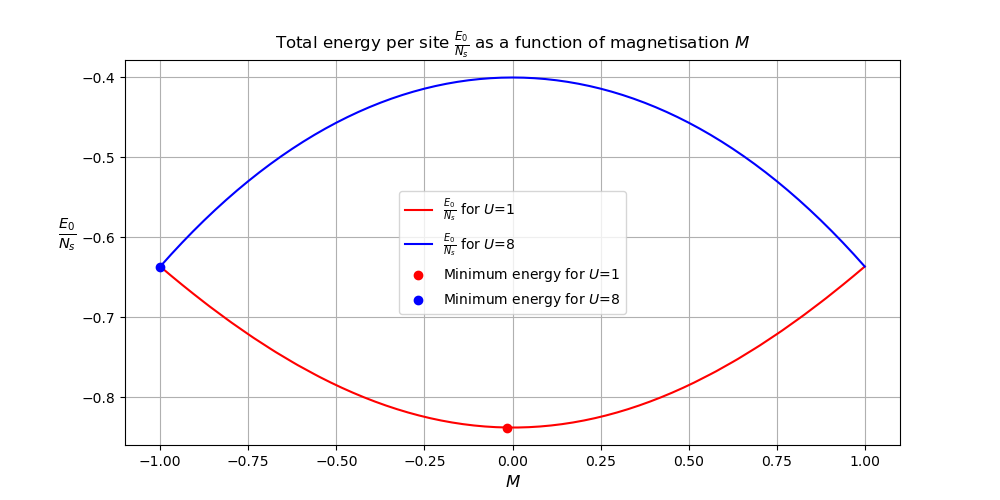

In [11]:
def M(Nupval):
    mag = []
    for n in Nupval:
        m = (2*n - N)/N
        mag = np.append(mag, m)
    return mag

%matplotlib widget
fig = plt.figure(figsize = (10,5))
plt.title(r'Total energy per site $\frac{E_0}{N_s}$ as a function of magnetisation $M$')
plt.plot(M(Nupval), energies(Nupval, 1), c = 'r', label = r'$\frac{E_0}{N_s}$ for $U$=' + str(1))
plt.scatter(M(Nupval)[energies(Nupval, 1).argmin()], np.min(energies(Nupval, 1)), 
            c = 'r', label = r'Minimum energy for $U$=' + str(1), zorder = 9)
plt.plot(M(Nupval), energies(Nupval, 8), c = 'b', label = r'$\frac{E_0}{N_s}$ for $U$=' + str(8))
plt.scatter(M(Nupval)[energies(Nupval, 8).argmin()], np.min(energies(Nupval, 8)), 
            c = 'b', label = r'Minimum energy for $U$=' + str(8), zorder= 9)
plt.xlabel(r'$M$', fontsize = 12)
plt.ylabel(r'$\frac{E_0}{N_s}$', rotation=0, fontsize = 15, labelpad = 10, y = 0.5)
plt.legend()
plt.grid()
plt.show()

## Part 3
<b>Run this algorithm for $t=1$ and an array of $U$ values in the range $2<U<6$. Make a plot of the minimum magnetisation $M$ as a function of $U$ and determine an approximate value of the critical $U=U_c$ at which the magnetisation makes the transition from $M=0$ to a ferromagnet ($M=1$).

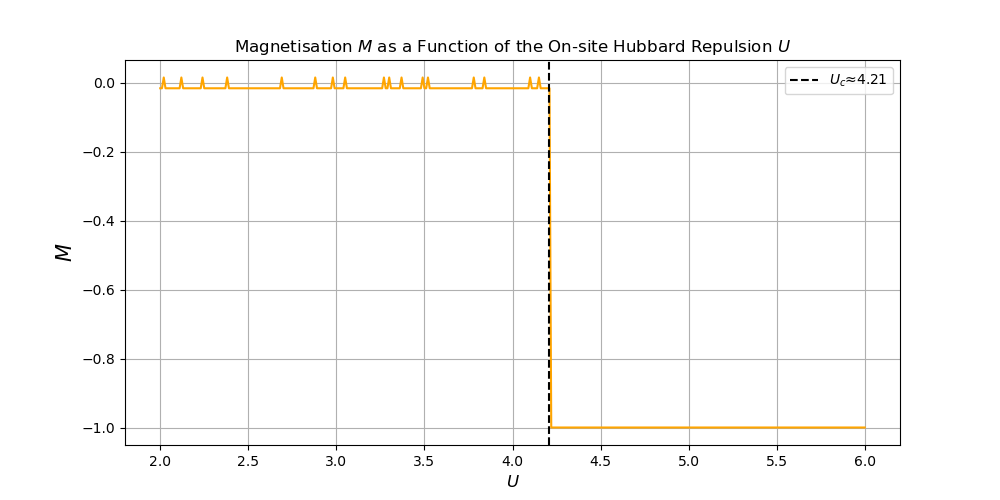

Critical U at ≈ 4.21.


In [12]:
Uval = np.arange(2,6.01,0.01)
def minmag(U):
    mins = []
    for u in U:
        nrgs = energies(Nupval, u)
        index = nrgs.argmin()
        Mmin = (2*Nupval[index] - N)/N
        mins = np.append(mins, Mmin)
    return mins

%matplotlib widget

Uc = 4.21
fig = plt.figure(figsize = (10,5))
plt.title(r'Magnetisation $M$ as a Function of the On-site Hubbard Repulsion $U$')
plt.plot(Uval, minmag(Uval), c = 'orange')
plt.xlabel(r'$U$', fontsize = 12)
plt.ylabel(r'$M$', fontsize = 15)
plt.axvline(Uc, label = r'$U_c≈$'+str(Uc), ls='--', c = 'k')
plt.legend()
plt.grid()
plt.show()
print("Critical U at ≈", str(Uc)+".")

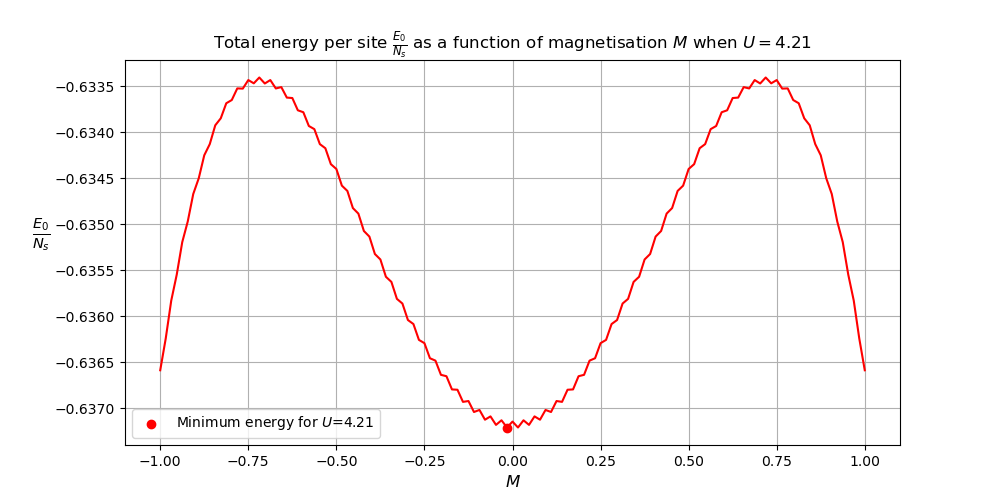

The shape is similar to that for a value of U close to the Stoner transition so the approximate value obtained for Uc must be right.


In [13]:
%matplotlib widget
fig = plt.figure(figsize = (10,5))
plt.title(r'Total energy per site $\frac{E_0}{N_s}$ as a function of magnetisation $M$ when $U = $'+ str(Uc))
plt.plot(M(Nupval), energies(Nupval, Uc), c = 'r')
plt.scatter(M(Nupval)[energies(Nupval, Uc).argmin()], np.min(energies(Nupval, Uc)), 
            c = 'r', label = r'Minimum energy for $U$=' + str(Uc), zorder = 9)
plt.xlabel(r'$M$', fontsize = 12)
plt.ylabel(r'$\frac{E_0}{N_s}$', rotation=0, fontsize = 15, labelpad = 10, y = 0.5)
plt.grid()
plt.legend()
plt.show()
print("The shape is similar to that for a value of U close to the Stoner transition \
so the approximate value obtained for Uc must be right.")